In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from salishsea_tools.nc_tools import scDataset
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_W
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

In [57]:
def get_variables_fluxes(dirname, filepattern, mbathy_diff):
    files = general_functions.get_files(dirname, filepattern, 'grid_W')
    #x, y =  slice(1,-1,None), slice(1,-1,None)
    vovecrtz = np.zeros_like(mbathy_diff)
    for y in range(mbathy_diff.shape[-2]):
        for x in range(mbathy_diff.shape[-1]):
            if mbathy_diff[y,x] > 0:
                z = mbathy[y, x]
                with scDataset(files) as ds:
                    vovecrtz[y, x] = ds.variables['vovecrtz'][:, z, y+1, x+1]
            else:
                vovecrtz[y, x] = 0
            if y*x > 5000:
                print(y*x)
                
    #tmask0 = tmask[:, y, x]
    #tmask = np.tile(tmask0, (vovecrtz0.shape[0], 1, 1, 1))  
    #vovecrtz = np.ma.array(vovecrtz0, mask=1 - tmask)
    return vovecrtz

In [3]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = functions_transport_W.get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepw0, tmask0, mbathy0, e1t0, e2t0 = functions_transport_W.get_variables_planes(dirname, filename)

In [63]:
mbathy_diff = mbathy - mbathy0
xs = np.arange(mbathy_diff.shape[-1])
ys = np.arange(mbathy_diff.shape[-2])
area_k = e1t * e2t
mbathy_mask = np.copy(mbathy_diff)
mbathy_mask[mbathy_mask > 0] = 1
area_k.shape

(272, 242)

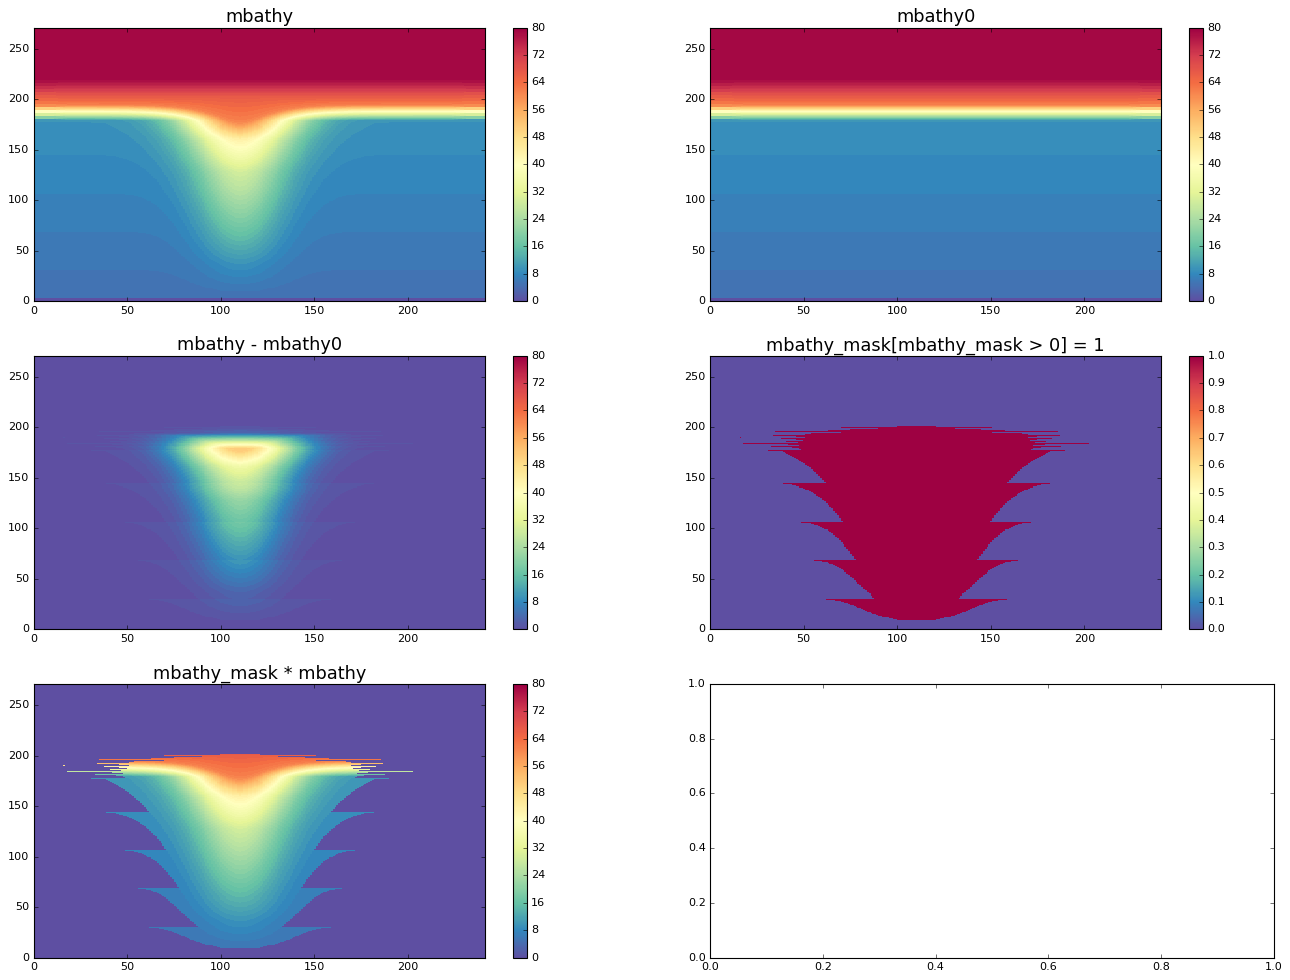

In [81]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20,15))
p1 = ax1.pcolormesh(xs, ys, mbathy, cmap=cm.Spectral_r, vmin=0, vmax=80)
p2 = ax2.pcolormesh(xs, ys, mbathy0, cmap=cm.Spectral_r, vmin=0, vmax=80)
p3 = ax3.pcolormesh(xs, ys, mbathy_diff, cmap=cm.Spectral_r, vmin=0, vmax=80)
p4 = ax4.pcolormesh(xs, ys, mbathy_mask, cmap=cm.Spectral_r)
p5 = ax5.pcolormesh(xs, ys, mbathy_mask * mbathy, cmap=cm.Spectral_r, vmin=0, vmax=80)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(0, xs[-1]); ax.set_ylim(0, ys[-1])

ttls = ['mbathy', 'mbathy0', 'mbathy - mbathy0', 'mbathy_mask[mbathy_mask > 0] = 1', 'mbathy_mask * mbathy']
for n, ax, p, ttl in zip(np.arange(5), [ax1, ax2, ax3, ax4, ax5], [p1,  p2, p3, p4, p5], ttls):
    fig.colorbar(p, ax=ax)
    ax.set_title(ttl, fontsize=16)